In [1]:
import pandas as pd

df = pd.read_csv('garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [2]:
df.shape
df.info
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [3]:
df.isnull().sum()
df.drop(['wip'], axis = 1, inplace = True)

We see that wip is the only column with null values, so we will drop it from our dataset. 

In [4]:
df['department'] = df['department'].str.strip()
df['department'] = df['department'].str.replace('sweing', 'sewing')
df['department'].value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

The "department" column had two finishing categories because of added whitespace in some of the strings, and it also misspelled sewing as sweing. Using string operations, we were able to correct these errors. 

In [5]:
df['date'].value_counts()

3/11/2015    24
1/31/2015    24
1/11/2015    23
3/10/2015    23
1/12/2015    23
1/24/2015    23
1/8/2015     22
1/10/2015    22
1/7/2015     22
1/13/2015    22
1/5/2015     22
3/9/2015     22
3/8/2015     22
3/3/2015     22
1/22/2015    22
2/25/2015    21
2/26/2015    21
2/28/2015    21
1/3/2015     21
1/4/2015     21
1/28/2015    21
1/27/2015    21
3/4/2015     21
1/25/2015    21
1/17/2015    21
1/14/2015    21
1/6/2015     21
2/18/2015    21
1/29/2015    20
2/17/2015    20
3/2/2015     20
3/1/2015     20
2/22/2015    20
2/19/2015    20
3/5/2015     19
3/7/2015     19
2/24/2015    19
2/23/2015    19
1/1/2015     19
2/3/2015     19
2/15/2015    19
1/15/2015    19
1/18/2015    19
1/19/2015    19
1/21/2015    19
1/26/2015    19
2/1/2015     19
2/2/2015     19
2/4/2015     19
2/7/2015     19
2/8/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/5/2015     18
2/9/2015     18
2/16/2015    18
2/14/2015    17
1/20/2015    15
Name: date, dtype: int64

Seeing as dates covers such a short period of time, we will drop it from our dataset as it is likely not a good predictor of productivity.

In [6]:
df.drop(['date'], axis = 1, inplace = True)

In [7]:
df['quarter'].value_counts()
df['quarter'] = df['quarter'].str.replace('Quarter5', 'Quarter4')
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

Seeing as we had 5 quarters, we relabeled the fifth quarter as being a part of the fourth quarter as they both encompassed dates near the end our timeframe.

In [8]:
df.isna().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [9]:
df['productivity'] = (df['targeted_productivity'] <= df['actual_productivity'])

In [10]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity', 'productivity'],
      dtype='object')

In [11]:
df['idle_time'].value_counts()

0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64

In [12]:
df['idle_men'].value_counts()

0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

We will drop the idle_men and idle_time columns because they contain almost exclusivly uniform values and add little to our analysis.

In [13]:
df.drop(['idle_men', 'idle_time'], axis = 1, inplace = True)

In [14]:
df['no_of_style_change'].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

We see that almost all of the no_of_style_change are 0, indicating it won't contribute much to our model.

In [15]:
df.drop('no_of_style_change', axis = 1, inplace = True)
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'no_of_workers', 'actual_productivity',
       'productivity'],
      dtype='object')

In [16]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

Below, we begin the process of making all of the data in our columns numerical, and we then use one-hot encoding to make them suitable for our model.

In [17]:
df.loc[df['quarter'] == 'Quarter1', 'quarter'] = 1
df.loc[df['quarter'] == 'Quarter2', 'quarter'] = 2
df.loc[df['quarter'] == 'Quarter3', 'quarter'] = 3
df.loc[df['quarter'] == 'Quarter4', 'quarter'] = 4

In [18]:
df.loc[df['department'] == 'sewing', 'department'] = 0
df.loc[df['department'] == 'finishing', 'department'] = 1
df.rename({'department': 'sewing?'}, axis = 1, inplace = True)

In [19]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [20]:
df = pd.concat([df, pd.get_dummies(df['quarter'], prefix = 'q')], axis = 1).drop('quarter', axis = 1)
df

C:\Users\green\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,sewing?,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productivity,q_1,q_2,q_3,q_4
0,0,Thursday,8,0.80,26.16,7080,98,59.0,0.940725,True,1,0,0,0
1,1,Thursday,1,0.75,3.94,960,0,8.0,0.886500,True,1,0,0,0
2,0,Thursday,11,0.80,11.41,3660,50,30.5,0.800570,True,1,0,0,0
3,0,Thursday,12,0.80,11.41,3660,50,30.5,0.800570,True,1,0,0,0
4,0,Thursday,6,0.80,25.90,1920,50,56.0,0.800382,True,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,Wednesday,10,0.75,2.90,960,0,8.0,0.628333,False,0,1,0,0
1193,1,Wednesday,8,0.70,3.90,960,0,8.0,0.625625,False,0,1,0,0
1194,1,Wednesday,7,0.65,3.90,960,0,8.0,0.625625,False,0,1,0,0
1195,1,Wednesday,9,0.75,2.90,1800,0,15.0,0.505889,False,0,1,0,0


In [21]:
df = pd.concat([df, pd.get_dummies(df['day'], prefix = None)], axis = 1).drop('day', axis = 1)
df

,sewing?,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productivity,q_1,q_2,q_3,q_4,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,8,0.80,26.16,7080,98,59.0,0.940725,True,1,0,0,0,0,0,0,1,0,0
1,1,1,0.75,3.94,960,0,8.0,0.886500,True,1,0,0,0,0,0,0,1,0,0
2,0,11,0.80,11.41,3660,50,30.5,0.800570,True,1,0,0,0,0,0,0,1,0,0
3,0,12,0.80,11.41,3660,50,30.5,0.800570,True,1,0,0,0,0,0,0,1,0,0
4,0,6,0.80,25.90,1920,50,56.0,0.800382,True,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,10,0.75,2.90,960,0,8.0,0.628333,False,0,1,0,0,0,0,0,0,0,1
1193,1,8,0.70,3.90,960,0,8.0,0.625625,False,0,1,0,0,0,0,0,0,0,1
1194,1,7,0.65,3.90,960,0,8.0,0.625625,False,0,1,0,0,0,0,0,0,0,1
1195,1,9,0.75,2.90,1800,0,15.0,0.505889,False,0,1,0,0,0,0,0,0,0,1


In [22]:
df = pd.concat([df, pd.get_dummies(df['team'], prefix = 'team')], axis = 1).drop('team', axis = 1)
df

,sewing?,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productivity,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,0,0.80,26.16,7080,98,59.0,0.940725,True,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.75,3.94,960,0,8.0,0.886500,True,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.80,11.41,3660,50,30.5,0.800570,True,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.80,11.41,3660,50,30.5,0.800570,True,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.80,25.90,1920,50,56.0,0.800382,True,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0.75,2.90,960,0,8.0,0.628333,False,0,1,...,0,0,0,0,0,0,0,1,0,0
1193,1,0.70,3.90,960,0,8.0,0.625625,False,0,1,...,0,0,0,0,0,1,0,0,0,0
1194,1,0.65,3.90,960,0,8.0,0.625625,False,0,1,...,0,0,0,0,1,0,0,0,0,0
1195,1,0.75,2.90,1800,0,15.0,0.505889,False,0,1,...,0,0,0,0,0,0,1,0,0,0


Now that we have cleaned and encoded our data, we will make a decision tree classifier model to predict whether an employee will be more or less procutive than their targeted goal.

In [23]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [24]:
X = df.drop(['actual_productivity', 'productivity'], axis = 1)
y = df['productivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, shuffle = True, random_state = 42)

class1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 69)
class1.fit(X_train, y_train)
y_pred = class1.predict(X_test)

from sklearn.metrics import accuracy_score

print("Accuracy: {}".format(accuracy_score(y_test, y_pred).round(4)))

Accuracy: 0.8333


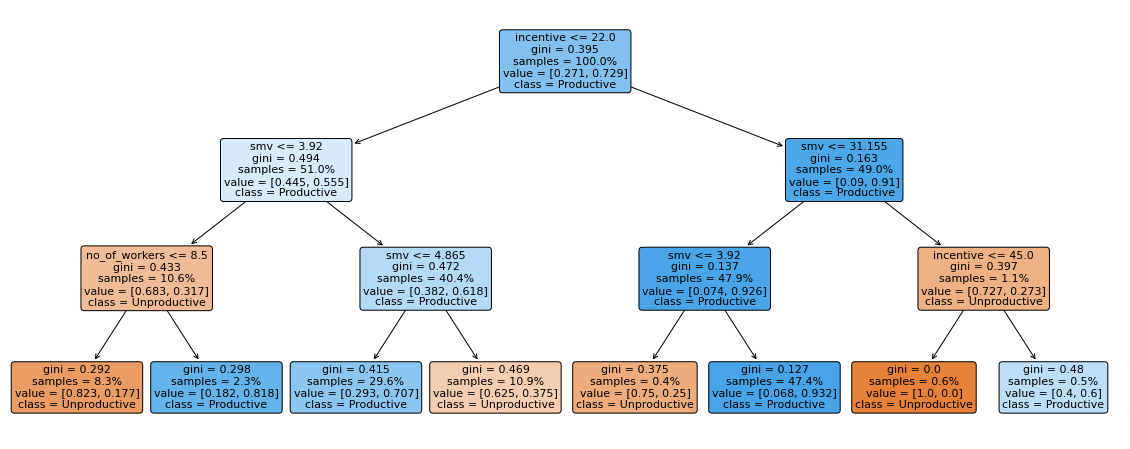

In [25]:
plt.figure(figsize = [20, 8])

plot_tree(class1, 
    feature_names = X.columns, 
    filled = True,   
    class_names = ['Unproductive', 'Productive'],
    proportion = True,
    rounded = True,
    fontsize = 11)


plt.show()

We can see that incentive and smv are the two most significant columns to our analysis, as they are used to split our data into classes to allow for more accurate classifications. We can also notice that out tree has only three levels. This is because we set the maximum depth of our tree to 3, otherwise we'd likely have more levels. It's also important to remember that the criteria for a given split is at the top of every leaf in our tree, and that false observations go to the right and true observations go to the left.

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 39,  24],
       [ 16, 161]], dtype=int64)

In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(class1, X, y, cv = 10)

print("Cross Validation Accuracy Scores:", scores.round(2)) 
print("Our mean Cross Validation Accuracy Score is: ", scores.mean().round(3))

Cross Validation Accuracy Scores: [0.82 0.86 0.82 0.84 0.85 0.8  0.72 0.74 0.82 0.77]
Our mean Cross Validation Accuracy Score is:  0.804


In [31]:
from sklearn.ensemble import RandomForestClassifier

class2 = RandomForestClassifier(n_estimators = 800, n_jobs = -1, random_state = 69, oob_score = True)
class2.fit(X_train, y_train)
y2_pred = class2.predict(X_test)
class2_score = class2.score(X_test, y_test)

print('Random Forest Accuracy Score: ', class2_score.round(4))

Random Forest Accuracy Score:  0.8125


In [29]:
oob_predictions = class2.oob_decision_function_
classes = class2.classes_
oob_clf = pd.DataFrame(data = oob_predictions, columns = classes) 
oob_clf['y_pred'] = oob_clf.idxmax(axis = 1)
oob_clf['y_test'] = y
oob_accuracy = accuracy_score(oob_clf['y_pred'], oob_clf['y_test'])
answer = (oob_accuracy == class2)
oob_clf

,False,True,y_pred,y_test
0,0.094444,0.905556,True,True
1,0.087209,0.912791,True,True
2,0.585799,0.414201,False,True
3,0.370000,0.630000,True,True
4,0.122093,0.877907,True,True
...,...,...,...,...
952,0.612360,0.387640,False,True
953,0.299465,0.700535,True,True
954,0.521739,0.478261,False,False
955,0.528205,0.471795,False,False


Above we can see how the oob score, an accuracy score calculated from data leftover from bootstrapping, is used to determine if we will label a given observation true or false (productive or unproductive).

Surprisingly, we see that our single decision tree classifier model is more accurate than our random forest classifier model. However, both were similarily accurate in classifying employee productivity. 